<a href="https://colab.research.google.com/github/nmneema/my-site/blob/main/anemiatypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [5]:
df=pd.read_csv('/content/diagnosed_cbc_data_v4.csv')

In [8]:
df.shape #rows,column

(1281, 15)

In [9]:
df.columns

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis'],
      dtype='object')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [18]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [6]:
df.sample(10)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
90,3.20,35.600,56.200,1.10000,1.80000,5.22,14.9,45.8000,87.8,28.5,32.5,132.0,14.300000,0.13000,Thrombocytopenia
494,13.00,18.000,72.800,2.30000,10.00000,4.54,9.6,32.4000,71.4,21.1,29.6,280.0,16.100000,0.15000,Iron deficiency anemia
847,8.00,25.845,77.511,1.88076,5.14094,5.30,13.5,46.1526,92.0,30.0,32.0,350.0,13.100000,0.26028,Healthy
1198,5.90,25.845,77.511,1.88076,5.14094,3.68,12.9,46.1526,88.4,35.6,34.1,183.0,14.312512,0.26028,Normocytic normochromic anemia
354,4.90,19.900,74.300,1.00000,3.60000,3.80,10.2,31.9000,84.1,26.8,31.9,163.0,13.100000,0.15000,Normocytic hypochromic anemia
1132,9.34,25.845,77.511,1.88076,5.14094,4.61,12.3,46.1526,84.8,26.7,31.5,196.0,14.312512,0.26028,Normocytic hypochromic anemia
938,10.80,25.845,77.511,1.88076,5.14094,4.36,9.3,46.1526,73.9,21.3,28.9,438.0,14.312512,0.26028,Iron deficiency anemia
538,8.00,25.845,77.511,1.88076,5.14094,5.00,13.2,46.1526,90.0,29.0,32.0,350.0,13.300000,0.26028,Healthy
733,7.80,25.845,77.511,1.88076,5.14094,5.60,13.6,46.1526,93.0,31.0,32.0,310.0,15.900000,0.26028,Healthy
754,8.30,25.845,77.511,1.88076,5.14094,5.40,14.2,46.1526,92.0,31.0,33.0,360.0,15.900000,0.26028,Healthy


In [15]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [14]:
df.dtypes

,0
WBC,float64
LYMp,float64
NEUTp,float64
LYMn,float64
NEUTn,float64
RBC,float64
HGB,float64
HCT,float64
MCV,float64
MCH,float64


In [13]:
df.isnull().sum()

,0
WBC,0
LYMp,0
NEUTp,0
LYMn,0
NEUTn,0
RBC,0
HGB,0
HCT,0
MCV,0
MCH,0


**data** **visualisation**


In [27]:
plt.figure(figsize=(12,8)) # creates an empty plot

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

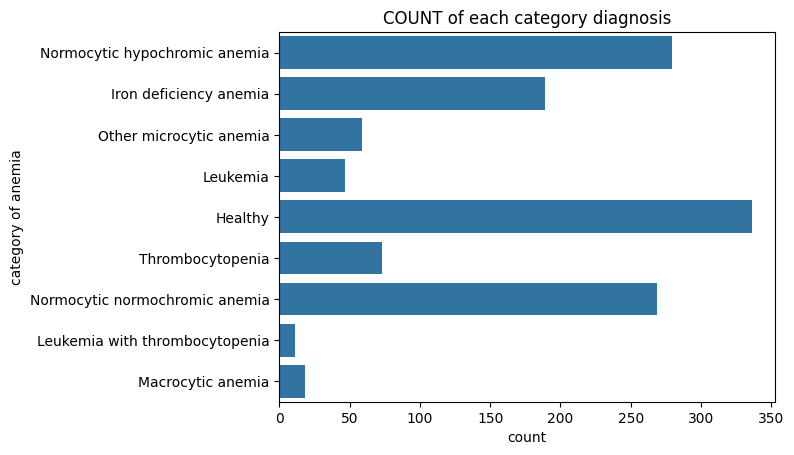

In [31]:
sns.countplot(y='Diagnosis' , data=df) # catogories od diagnosis on y axis,count on x axis
plt.title('COUNT of each category diagnosis')
plt.xlabel('count')
plt.ylabel('category of anemia')
plt.show()

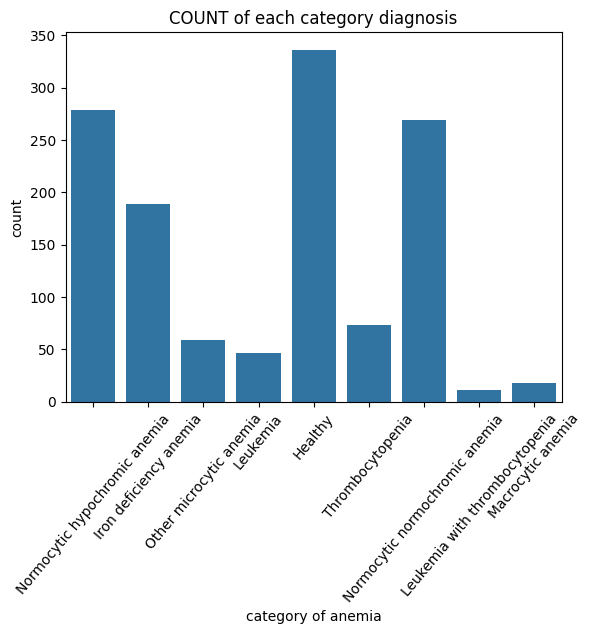

In [35]:
sns.countplot(x='Diagnosis' , data=df) # catogories od diagnosis on y axis,count on x axis
plt.title('COUNT of each category diagnosis')
plt.ylabel('count')
plt.xlabel('category of anemia')
plt.xticks(rotation=50)
plt.show()